In [37]:
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib.font_manager  
import pandas as pd
from sklearn import svm  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve,confusion_matrix,classification_report
plt.style.use('seaborn')

In [38]:
d = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Fire/CDI_Based/Entropy/CSV/Harris.csv',index_col=0)
d.Class[d['Class']==1] = -1
d.Class[d['Class'] == 0] = 1
display(d.head())

<ipython-input-38-d2a3395998a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class']==1] = -1
<ipython-input-38-d2a3395998a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class'] == 0] = 1


0         1         2         3         4         5         6  \
0  0.454707  0.317510  0.541025  0.516889  0.572619  0.361957  0.530238   
1  0.653275  0.627490  0.377973  0.362410  0.526718  0.480967  0.338751   
2  1.306830  1.038966  0.812116  1.101646  1.151375  0.368440  0.963364   
3  0.121075  0.119532  0.156628  0.170157  0.215857  0.249458  0.171689   
4  0.320366  0.277783  0.246622  0.266262  0.310539  0.286380  0.326042   

          7         8         9  ...        19        20        21        22  \
0  0.422593  0.364122  0.405911  ...  0.362454  0.060185  0.057064  0.099125   
1  0.626883  0.533285  0.353150  ...  0.405550  0.175780  0.187618  0.196868   
2  1.184813  1.253985  0.821473  ...  1.168494  1.123493  0.820154  1.254591   
3  0.201124  0.168167  0.244455  ...  0.036652  0.036652  0.036652  0.026018   
4  0.348516  0.306517  0.315211  ...  0.183163  0.380134  0.362799  0.388615   

         23        24        25        26        27  Class  
0  0.089168  0.063833  0.051531  0.049841  0.043928      1  
1  0.127997  0.221686  0.173587  0.127909  0.088443      1  
2  1.176869  0.380036  1.173836  1.035493  1.125513      1  
3  0.015866  0.076229  0.038476  0.041760  0.045025      1  
4  0.312442  0.342832  0.383292  0.303030  0.371655      1  

[5 rows x 29 columns]

In [39]:
data = d
mask = (data['Class'] == 1)

X_train, X_test = train_test_split(data[mask], test_size=0.2, random_state=2)
X_train = X_train.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)
X_fraud = data[~mask].drop(['Class'], axis=1)

x_test=np.vstack((X_test,X_fraud))
y_test=[1]*len(X_test)+[-1]*len(X_fraud)
std=StandardScaler()
X_train=std.fit_transform(X_train)
x_test=std.transform(x_test)

In [40]:
clf = svm.OneClassSVM(kernel='rbf',nu=0.6)  
clf.fit(X_train)  

y_pred = clf.predict(x_test)  
y_prob = clf.decision_function(x_test)  # the lower, the more normal

fpr,tpr,threshold_svc = metrics.roc_curve(y_test,y_prob)     
auc_svc = metrics.auc(fpr,tpr)   

precision, recall, _ = precision_recall_curve(y_test,y_prob)
pr_auc = auc(recall, precision)

score_svc = metrics.accuracy_score(y_test,y_pred)

print(score_svc)
print(classification_report(y_test, y_pred))

0.6309523809523809
              precision    recall  f1-score   support

          -1       0.85      0.68      0.76       142
           1       0.17      0.35      0.23        26

    accuracy                           0.63       168
   macro avg       0.51      0.51      0.49       168
weighted avg       0.74      0.63      0.68       168



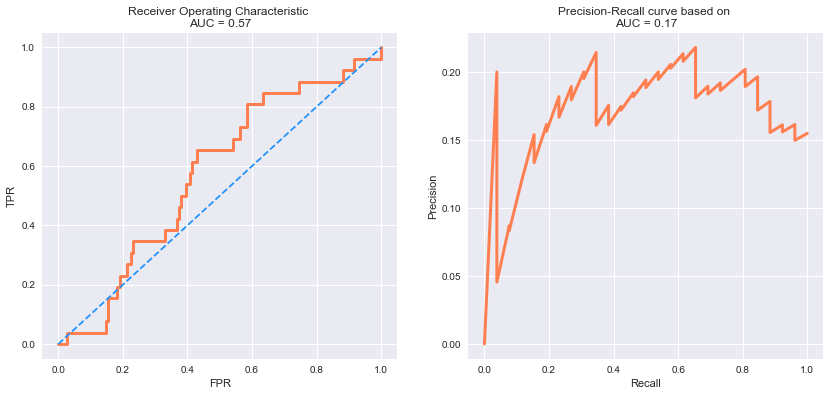

In [41]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
#plt.figure(figsize=(14, 6))
plt.title('Receiver Operating Characteristic \nAUC = %0.2f'% auc_svc)   
plt.plot(fpr, tpr, c='coral', lw=3)
plt.plot([0,1],[0,1], c='dodgerblue', ls='--')
plt.ylabel('TPR'); plt.xlabel('FPR')

plt.subplot(122)
plt.title('Precision-Recall curve based on \nAUC = %0.2f'% pr_auc)
plt.plot(recall[:-2], precision[:-2], c='coral', lw=3)
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.show()